# Лабораторная №1. Проверка статистических гипотез

> Вариант № ??

**Распределения**:

$X_1$ ~ ?? (объём выборки $n_1$ = ??)

$X_2$ ~ ?? (объём выборки $n_2$ = ??)


*Импорт необходимых библиотек:*

In [15]:
%matplotlib inline
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Генерация выборок

`x = np.random.<`*`distribution`*`>(`*`...params`*`, `*`size`*`)`, где

- *distribution* - распределение;
- *...params* - параметры распределения;
- *size* - размер выборки

Доступные распределения:

- нормальное: normal(m, $\sigma^2$)
- равномерное: uniform(a, b)
- хи-квадрат: chisquare(k)

*Рекомендуется объявить функцию генерации выборки, поскольку в одном из следующих разделов выборку придётся генерировать N раз*


In [3]:
# Sample sizes
n1 = 100
n2 = 100

# Sample generators
def gen_x1():
    return np.random.chisquare(3, n1)

def gen_x2():
    return np.random.normal(0, 2, n2)

# Samples
x1, x2 = gen_x1(), gen_x2()

### 1. Выборочные характеристики

In [4]:
print(np.mean(x1))
print(np.std(x2))
print(np.var(x2))

3.26651911444
1.94478087942
3.78217266895


- `np.mean` - среднее значение
- `np.std` - $s$ - оценка с.к.о.
- `np.var` - $s^2$ - оценка дисперсии

### 2. Однопараметрические критерии

Для получения свойств стандартных распределений используем модуль `stats`:

- для нормального распределения `stats.norm`;
- для Стьюдента `stats.t`;
- для хи-квадрат `stats.chi2`.

Квантиль распределения: `stats.<distribution>.ppf(<уровень значимости>, ...<параметры распределения>)`

Функция распределения: F(x) = `stats.<distribution>.cdf(x, ...<параметры распределения>)`

Функция плотности вероятности: f(x) = `stats.<distribution>.pdf(x, ...<параметры распределения>)`

Проверим гипотезу $H_0: X_2 \sim N(m_0 = 0.2, \sigma^2)$ на уровне значимости $\alpha = .05$ при альтернативной двусторонней гипотезе ($\sigma$ считаем неизвестным):

In [11]:
def criterion(sample):
    s = np.std(sample) # s - оценка с.к.о.
    mean = np.mean(sample) # выборочное среднее
    m0 = 0.2 # основная гипотеза: МО генеральной совокупности для x2 составляет m0
    return (mean - m0) / s / np.sqrt(len(sample))

# t-test
criterion_value = criterion(x2) # значение статистики критерия для гипотезы H0: m = m0, сигма неизвестна

alpha = 0.05 # задаёмся уровнем значимости
student_quantile = stats.t.ppf(1 - alpha / 2, n2 - 1) # рассчитываем квантиль распределения Стьюдента

critical_value = student_quantile # критическое значение статистики критерия

print("Значение критерия: {}, критическое значение: {}".format(criterion_value, critical_value))

is_h0_true = abs(criterion_value) < critical_value

print("Гипотеза H0 принимается" if is_h0_true else "Гипотеза H0 отклоняется")

Значение критерия: -0.004973268385804711, критическое значение: 1.9842169515086827
Гипотеза H0 принимается


### 3. P-value

Рассчёт p-value для право-, лево- и двусторонней альтернативных гипотез:

In [9]:
# статистика критерия в предыдущем примере распределена как T(n2 - 1)
def left_p_value(criterion_value, sample_size):
    return stats.t.cdf(criterion_value, sample_size - 1)

def right_p_value(criterion_value, sample_size):
    return 1 - stats.t.cdf(criterion_value, sample_size - 1)

def two_sided_p_value(criterion_value, sample_size):
    left_p = left_p_value(criterion_value, sample_size)
    return 2 * min(left_p, 1 - left_p)

print("Двустороннее p-value: {}".format(two_sided_p_value(criterion_value, n2)))

Двустороннее p-value: 0.9960419300473141


Вычислим для выборки мощностью N выборочные значения для случайных величин p-value и значения статистики критерия:

In [27]:
N = 100

criteria = []
p_values = []

for i in range(0, N):
    sample = gen_x2()
    
    criterion_value = criterion(sample)
    criteria.append(criterion_value)
    
    p_value = two_sided_p_value(criterion_value, len(sample))
    p_values.append(p_value)

print("Criterion:")
print("mean = {}, s^2 = {}, s = {}".format(np.mean(criteria), np.var(criteria), np.std(criteria)))

print("P-value:")
print("mean = {}, s^2 = {}, s = {}".format(np.mean(p_values), np.var(p_values), np.std(p_values)))

Criterion:
mean = -0.011183882933076351, s^2 = 0.00010916177319308734, s = 0.010448051167231492
P-value:
mean = 0.9900919945332585, s^2 = 5.0172966162281195e-05, s = 0.007083287807387272


**Графики** теоретических распределений и гистограммы эспериментальных значений:

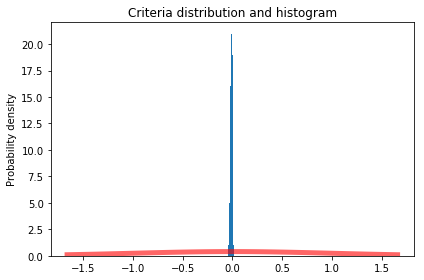

In [35]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(criteria, 10)

# plot
x = np.linspace(stats.t.ppf(0.05, n2 - 1), stats.t.ppf(0.95, n2 - 1), 100)
ax.plot(x, stats.t.pdf(x, n2 - 1), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Criteria distribution and histogram")
ax.set_ylabel("Probability density")

fig.tight_layout()
plt.show()

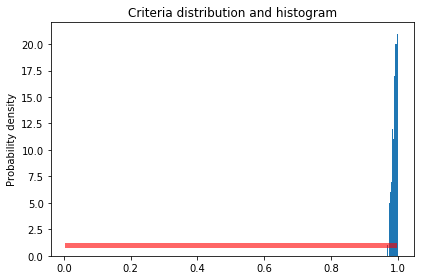

In [36]:
fig, ax = plt.subplots()

# histogram
n, bins, patches = ax.hist(p_values, 10)

# plot
x = np.linspace(stats.uniform.ppf(0.01), stats.uniform.ppf(0.99), 100)
ax.plot(x, stats.uniform.pdf(x), 'r-', lw=5, alpha=0.6, label='Theoretical')

ax.set_title("Criteria distribution and histogram")
ax.set_ylabel("Probability density")

fig.tight_layout()
plt.show()